<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM3/AI_at_Scale/Assignments/Assignment3_4/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
! pip  install torch matplotlib numpy pandas scikit-learn transformers datasets accelerate
! pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 827.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [1]:
import torch


/home/aymuos/miniconda3/envs/bigdl_py37/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(torch.cuda.is_available())

True


In [11]:
import torchvision
from torchvision.transforms import transforms
from torchvision.datasets import CIFAR10
from torchvision import models
from torchvision import datasets, transforms
import numpy as np

from pyspark.sql import SparkSession, Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import time


from collections import Counter

In [4]:
# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torchvision.__version__)
print(f"Using device: {device}")

0.10.0+cu102
Using device: cuda


Q1 - Showing plot and visualize data

In [6]:
%pip install matplotlib

from torchvision.datasets import CIFAR10

import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [7]:
# Download datasets
trainset = CIFAR10(root='./data', train=True, download=True)
testset = CIFAR10(root='./data', train=False, download=True)

import random
# Select random images from the training set
# Select random subset indices
train_indices = random.sample(range(len(trainset)), 10000)
test_indices = random.sample(range(len(testset)), 500)

# Create subset datasets
subset_train = [trainset[i] for i in train_indices]
subset_test = [testset[i] for i in test_indices]

Files already downloaded and verified
Files already downloaded and verified


In [8]:
subset_test[:15]
# this is a tuple of image and label

[(<PIL.Image.Image image mode=RGB size=32x32>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32>, 8),
 (<PIL.Image.Image image mode=RGB size=32x32>, 0),
 (<PIL.Image.Image image mode=RGB size=32x32>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32>, 6),
 (<PIL.Image.Image image mode=RGB size=32x32>, 7),
 (<PIL.Image.Image image mode=RGB size=32x32>, 2),
 (<PIL.Image.Image image mode=RGB size=32x32>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32>, 9),
 (<PIL.Image.Image image mode=RGB size=32x32>, 4),
 (<PIL.Image.Image image mode=RGB size=32x32>, 0),
 (<PIL.Image.Image image mode=RGB size=32x32>, 0),
 (<PIL.Image.Image image mode=RGB size=32x32>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32>, 4)]

In [9]:
# Getting all labels from subset_train

class_labels = [labels for x,labels in subset_train]

# typecasting to set to get unique classes
unique_classes = set(class_labels)
print(f"Unique classes in subset_train: {unique_classes}")

Unique classes in subset_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Plot the class distribution in the complete train and test datasets.

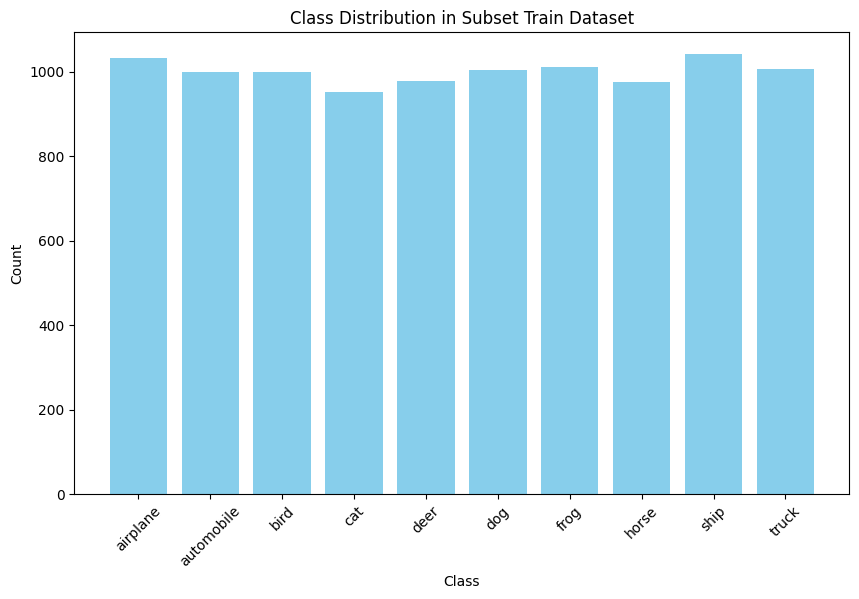

In [ ]:
#CIFAR 10 has 10 clsses 0 to 9

# counts = Counter(class_labels)

# class_names = trainset.classes

# x = [class_names[i] for i in range(10)]  # 10 class names
# y = [counts[i] for i in range(10)]   # counts of each class in the subset train dataset

# # drawing class plots


# plt.figure(figsize=(10, 6))
# plt.bar(x, y,color='skyblue')
# plt.title("Class Distribution in Subset Train Dataset")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

Plot the class distribution in the selected subset of the train and test datasets.

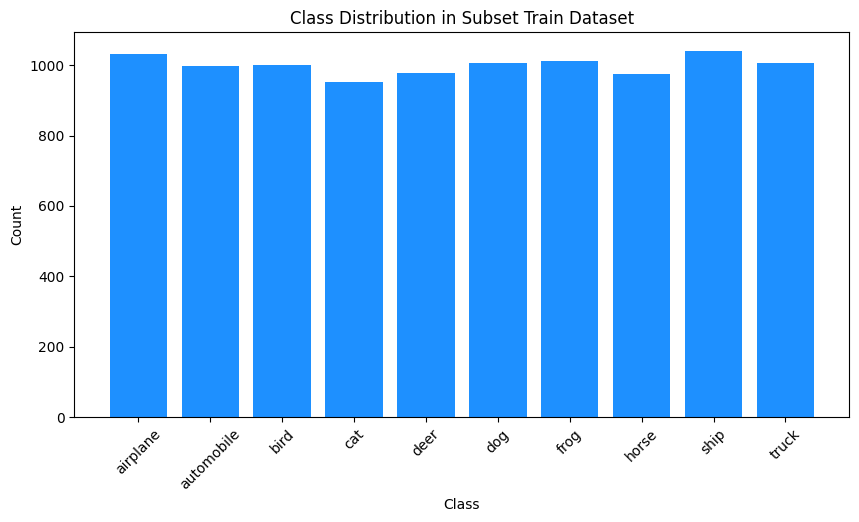

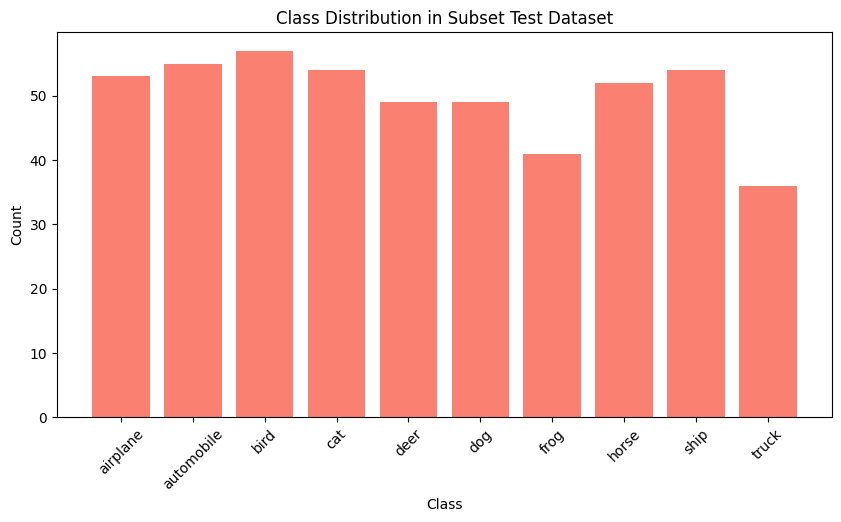

In [ ]:
# import matplotlib.pyplot as plt
# from collections import Counter

# # Get labels from subset_train and subset_test
# subset_train_labels = [label for _, label in subset_train]
# subset_test_labels = [label for _, label in subset_test]

# # Count occurrences for each class
# train_counts = Counter(subset_train_labels)
# test_counts = Counter(subset_test_labels)

# class_names = trainset.classes

# # Prepare data for plotting
# x = [class_names[i] for i in range(10)]
# y_train = [train_counts[i] for i in range(10)]
# y_test = [test_counts[i] for i in range(10)]

# # Plot for subset_train
# plt.figure(figsize=(10, 5))
# plt.bar(x, y_train, color='dodgerblue')
# plt.title("Class Distribution in Subset Train Dataset")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

# # Plot for subset_test
# plt.figure(figsize=(10, 5))
# plt.bar(x, y_test, color='salmon')
# plt.title("Class Distribution in Subset Test Dataset")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

# part 2 Feature extraction

In [15]:
#  extract features from the CIFAR-10 dataset.

model = models.mobilenet_v2(pretrained=True)

####################################################################################

# transforming  to required size and normalizing

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],           # Average pixel intensity in the Red, Green, Blue channels across the entire ImageNet training set.
                         std=[0.229, 0.224, 0.225])            # Standard deviation of pixel intensities in each channel (also after scaling to 0–1 range).
])


# seperating the train and test datasets into dataloaders

# Re-create datasets with transform
trainset_fe = datasets.CIFAR10(root='data', train=True, download=False, transform=transform)
testset_fe  = datasets.CIFAR10(root='data', train=False, download=False, transform=transform)





In [ ]:
# Load MobileNetV2 pretrained on ImageNet
from torchvision import models

try:
	from torchvision.models import MobileNet_V2_Weights
	mobilenet = models.mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
except ImportError:
	mobilenet = models.mobilenet_v2(pretrained=True)   # older torchvision versions -- esp for question 4

# Remove the classification head
mobilenet.classifier = torch.nn.Identity()

mobilenet = mobilenet.to(device)
mobilenet.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [ ]:
import random
import math

def extract_random_features(dataset, sample_size, batch_size=32):
    # Get random indices
    indices = list(range(len(dataset)))
    random.shuffle(indices)
    indices = indices[:sample_size]

    features_list, labels_list = [], []
    with torch.no_grad():
        # Process in batches
        for i in range(0, len(indices), batch_size):
            batch_indices = indices[i:i + batch_size]
            batch_images = []
            batch_labels = []
            for idx in batch_indices:
                img, label = dataset[idx]
                batch_images.append(img)
                batch_labels.append(label)

            # Stack images into a single tensor
            images_tensor = torch.stack(batch_images).to(device)

            # Extract features for the batch
            batch_feats = mobilenet(images_tensor).cpu().numpy()

            features_list.extend(batch_feats)
            labels_list.extend(batch_labels)

    return np.array(features_list), np.array(labels_list)

# Use random samples instead of first few
train_features, train_labels = extract_random_features(trainset_fe, 10000, batch_size=128)
test_features, test_labels = extract_random_features(testset_fe, 500, batch_size=128)

print("Train features:", train_features.shape)
print("Test features:", test_features.shape)

Train features: (10000, 1280)
Test features: (500, 1280)


----------------------------------------------------------------

List the available classifiers in the Spark ML library that can be used to build
classifiers using the extracted features.

----------------------------------------------------------------

In [43]:
from pyspark.sql import SparkSession

# SPARK INITIALIZATION ##############################################
student_id = "CH24M571"  # your roll number, letters must be in capital letter
app_name = student_id + "_Assignment_3_4"
assignment_no = "Assignment_3_4"

# spark = SparkSession.builder \
#     .appName(app_name) \
#     .config("spark.executor.memory", "10G") \
#     .config("spark.executor.cores", "6") \
#     .config("spark.cores.max", "6") \
#     .getOrCreate()


#########################################################################


# from pyspark.ml.linalg import Vectors
# # convert into (Vectors.dense(...), label) tuples
# data_tuples = [(Vectors.dense(x.tolist()), int(y)) for x,y in zip(train_features, train_labels)]
# train_spark_df = spark.createDataFrame(data_tuples, ["features", "label"])

# same for test


In [44]:
# lISTING ALL AVAILABLE CLASSIFIERS IN SPARK ML LIBRARY

from pyspark.ml import classification

# List all classes in the classification module
available_classifiers = [f"{cls}" for cls in dir(classification) if not cls.startswith("_") and cls.endswith("Classifier")]
print(available_classifiers)


['Classifier', 'DecisionTreeClassifier', 'FMClassifier', 'GBTClassifier', 'MultilayerPerceptronClassifier', 'ProbabilisticClassifier', 'RandomForestClassifier']


---------------------------------------------------

SELECTING 3 MODELS

1. LOgistic Regression - baseline linear model - quite possibly the simplest model
2. RandomForestClassifier - tree based classifier  -- using this to capture non-linear relationships  
3. Naive Bayes classifier -- probabilistic model - main reason to choose this is the speed .. expected will perform worse than GBT

---------------------------------------------------

-----------------------------------------------------

In [45]:
# FUNCTION TO CREATE SPARK SESSION




def create_spark_session(app_name, executor_memory="10G", executor_cores=6, cores_max=6):
    """
    Create a Spark session with specified configurations.

    Parameters:
    - app_name: Name of the Spark application.
    - executor_memory: Memory allocated for each executor.
    - executor_cores: Number of cores allocated for each executor.
    - cores_max: Maximum number of cores to use across all executors.

    Returns:
    - SparkSession object.
    """
    spark = SparkSession.builder \
        .appName(app_name) \
        .config("spark.executor.memory", executor_memory) \
        .config("spark.executor.cores", executor_cores) \
        .config("spark.cores.max", cores_max) \
        .config("spark.sql.shuffle.partitions", "200") \
        .config("spark.default.parallelism", "200") \
        .getOrCreate()

    return spark




# FUNCTION TO SELECT MODELS

def to_spark_df(spark, features, labels):
    rows = [Row(features=Vectors.dense(f.tolist()), label=float(l))
            for f, l in zip(features, labels)]
    return spark.createDataFrame(rows)


#FUNCTION TO TRAIN AND EVALUATE MODELS

def train_and_evaluate(train_df, test_df):
    print("Starting training and evaluate")
    evaluator_acc = MulticlassClassificationEvaluator(metricName="accuracy")
    evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1")

    results = []

    # Logistic Regression
    lr = LogisticRegression(maxIter=50, regParam=0.01)
    start = time.time()
    lr_model = lr.fit(train_df)
    lr_preds = lr_model.transform(test_df)
    duration = time.time() - start
    results.append(("Logistic Regression",
                    evaluator_acc.evaluate(lr_preds),
                    evaluator_f1.evaluate(lr_preds),
                    duration))

    print("Logistic Regression completed ")
    # Random Forest Classifier
    rf = RandomForestClassifier(numTrees=50, maxDepth=10)
    start = time.time()
    rf_model = rf.fit(train_df)
    rf_preds = rf_model.transform(test_df)
    duration = time.time() - start
    results.append(("Random Forest",
                    evaluator_acc.evaluate(rf_preds),
                    evaluator_f1.evaluate(rf_preds),
                    duration))
    print("Random Forest completed ")

    # Naive Bayes
    nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
    start = time.time()
    nb_model = nb.fit(train_df)
    nb_preds = nb_model.transform(test_df)
    duration = time.time() - start
    results.append(("Naive Bayes",
                    evaluator_acc.evaluate(nb_preds),
                    evaluator_f1.evaluate(nb_preds),
                    duration))

    print("Naive Bayes completed ")
    return results



Running spark configurations

In [ ]:
configs = [
    {"executor_cores": 2, "max_cores": 4, "executor_memory": "4g"},
    {"executor_cores": 4, "max_cores": 8, "executor_memory": "8g"},
    {"executor_cores": 2, "max_cores": 8, "executor_memory": "10g"}
]

all_results = []

# Stop existing Spark session if it exists before starting the loop
if 'spark' in locals() and spark:
    spark.stop()

for i, cfg in enumerate(configs, start=1):
    print(f"\n=== Running Configuration {i}: {cfg} ===")

    spark = create_spark_session(
        app_name=f"{app_name}-{i}",
        executor_cores=cfg["executor_cores"],
        cores_max=cfg["max_cores"],
        executor_memory=cfg["executor_memory"],
    )

    # Convert data to Spark DF
    # Increasing partitions to distribute data more evenly
    train_df = to_spark_df(spark, train_features, train_labels).repartition(8)
    test_df = to_spark_df(spark, test_features, test_labels).repartition(8)

    # Train and evaluate
    results = train_and_evaluate(train_df, test_df)
    all_results.append((cfg, results))

# Stop the final Spark session
if 'spark' in locals() and spark:
    spark.stop()

ConnectionRefusedError: [Errno 111] Connection refused

In [ ]:
# Running the results

print("\n===== Final Comparison =====")
for cfg, res in all_results:
    print(f"\nConfig: {cfg}")
    print("{:<20} {:<12} {:<12} {:<10}".format("Model", "Accuracy", "F1-score", "Time(s)"))
    for name, acc, f1, t in res:
        print("{:<20} {:<12.4f} {:<12.4f} {:<10.2f}".format(name, acc, f1, t))